In [7]:
import warnings
warnings.filterwarnings("ignore")

## 1.4 数据z-score标准化 - 输出文件'output/data_standardization.csv'

In [1]:
### 使用StandardScaler标准化数据
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 读取数据
data = pd.read_csv('output/data_outlier_handling_by_industry.csv')

# 分离特征和标签
# 保存FLAG列和其他不需要标准化的列
columns_not_to_standardize = ['FLAG', 'Industry', 'TICKER_SYMBOL']

# 获取需要标准化的列（排除不需要标准化的列）
features_to_standardize = [col for col in data.columns if col not in columns_not_to_standardize]

# 创建StandardScaler对象
scaler = StandardScaler()

# 对需要标准化的特征进行标准化
data_standardized = data.copy()
data_standardized[features_to_standardize] = scaler.fit_transform(data[features_to_standardize])

# 保存标准化后的数据
data_standardized.to_csv('output/data_standardization.csv', index=False)

print("数据标准化完成，已保存到data_standardization.csv")

数据标准化完成，已保存到data_standardization.csv


In [2]:
data_standardized.shape

(20888, 108)

In [3]:
data_standardized

TICKER_SYMBOL  END_DATE_REP  CASH_C_EQUIV  NOTES_RECEIV        AR  \
0             4019.0     -1.533130     -0.114801      0.249868 -0.194643   
1             4019.0     -0.966834     -0.138252      0.192995 -0.267153   
2             4019.0     -0.400539     -0.136728      0.452159 -0.167184   
3             4019.0      0.165757     -0.148365      1.000558  0.156713   
4             4019.0      0.732053     -0.028784      1.281983  0.059916   
...              ...           ...           ...           ...       ...   
20883      4582432.0      0.165757     -0.167754     -0.492109 -0.578990   
20884      4582432.0      0.165757     -0.164121     -0.492109 -0.577842   
20885      4582432.0      0.165757     -0.168565     -0.492109 -0.571349   
20886      4582432.0      0.732053     -0.161465     -0.492109 -0.599614   
20887      4582432.0      1.298348     -0.152030     -0.492109 -0.622420   

       PREPAYMENT  OTH_RECEIV  INVENTORIES    OTH_CA      T_CA  ...  \
0       -0.416163   -0.262746    -0.215319 -0.004067 -0.158220  ...   
1       -0.433169   -0.254677    -0.203211 -0.233389 -0.165366  ...   
2       -0.403217   -0.174441    -0.180667  0.326472 -0.143315  ...   
3       -0.406952   -0.173532    -0.182467  0.061488 -0.145240  ...   
4       -0.221400   -0.165588    -0.173678 -0.159182 -0.097940  ...   
...           ...         ...          ...       ...       ...  ...   
20883   -0.445930   -0.242060    -0.233850 -0.285537 -0.191294  ...   
20884   -0.440609   -0.240414    -0.234194 -0.278302 -0.190080  ...   
20885   -0.456137   -0.246565    -0.234710 -0.260269 -0.189270  ...   
20886   -0.441149   -0.246542    -0.233955 -0.274952 -0.189595  ...   
20887   -0.450389   -0.245807    -0.233334 -0.284740 -0.188056  ...   

       BIZ_TAX_SURCHG  NOPERATE_EXP  GOING_CONCERN_NI  COMPR_INC_ATTR_M_S  \
0           -0.286148     -0.441213         -0.407630           -0.261208   
1           -0.280719     -0.322049         -0.407630           -0.289084   
2           -0.275867     -0.408283         -0.407630           -0.453199   
3           -0.257776     -0.318082         -0.209067           -0.301421   
4           -0.238212     -0.221607          0.456516           -0.300429   
...               ...           ...               ...                 ...   
20883       -0.265658     -0.440285         -0.407630           -0.245475   
20884       -0.261241     -0.305141         -0.407630           -0.244703   
20885       -0.253603     -0.297670         -0.407630           -0.243816   
20886       -0.260836     -0.354716         -0.244966           -0.243816   
20887       -0.268435     -0.266956         -0.296703           -0.243816   

       INCOME_TAX  NOPERATE_INCOME  MINORITY_GAIN    T_COGS       Industry  \
0       -0.197558        -0.119327      -0.264747 -0.531391            制造业   
1       -0.225577        -0.143415      -0.292909 -0.532620            制造业   
2       -0.317717        -0.160889      -0.455578 -0.461877            制造业   
3       -0.239763         0.692484      -0.304901 -0.381568            制造业   
4       -0.126806        -0.563735      -0.303523 -0.417103            制造业   
...           ...              ...            ...       ...            ...   
20883   -0.229893        -0.609152      -0.248993 -0.508508  居民服务、修理和其他服务业   
20884   -0.216690        -0.601743      -0.248221 -0.495752  居民服务、修理和其他服务业   
20885   -0.192001        -0.541105      -0.247335 -0.492682  居民服务、修理和其他服务业   
20886   -0.213917        -0.516335      -0.247335 -0.483979  居民服务、修理和其他服务业   
20887   -0.242294        -0.388222      -0.247335 -0.487248  居民服务、修理和其他服务业   

       FLAG  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
...     ...  
20883   0.0  
20884   0.0  
20885   0.0  
20886   0.0  
20887   NaN  

[20888 rows x 108 columns]

### 查看造假/非造假数量 - 数据不平衡处理之后比对

In [11]:
from tabulate import tabulate

df = pd.read_csv('output/data_standardization.csv')

# Flag为1表示造假，Flag为0表示不造假，Flag为空表示未知
fraud_counts = df[df['FLAG'] == 1].groupby('Industry').size().reset_index(name='Fraud_Count')
non_fraud_counts = df[df['FLAG'] == 0].groupby('Industry').size().reset_index(name='Non_Fraud_Count')
unknown_counts = df[df['FLAG'].isna()].groupby('Industry').size().reset_index(name='Unknown_Count')

# 合并三个结果，以行业为基准
merged = fraud_counts.merge(non_fraud_counts, on='Industry', how='outer').merge(unknown_counts, on='Industry', how='outer').fillna(0)

# 按照造假数量降序排序
merged_sorted = merged.sort_values(by='Fraud_Count', ascending=False)

# 使用tabulate库以表格形式输出，设置所有内容左对齐
print(tabulate(merged_sorted.values, merged_sorted.columns, tablefmt='pretty', colalign=('left',)*len(merged_sorted.columns)))

+----------------------------------+-------------+-----------------+---------------+
| Industry                         | Fraud_Count | Non_Fraud_Count | Unknown_Count |
+----------------------------------+-------------+-----------------+---------------+
| 制造业                           | 84.0        | 10547           | 2500          |
| 信息传输、软件和信息技术服务业   | 17.0        | 1347            | 325           |
| 批发和零售业                     | 14.0        | 754             | 162           |
| 金融业                           | 11.0        | 476             | 110           |
| 房地产业                         | 10.0        | 513             | 108           |
| 农、林、牧、渔业                 | 7.0         | 191             | 41            |
| 建筑业                           | 5.0         | 405             | 87            |
| 电力、热力、燃气及水生产和供应业 | 4.0         | 520             | 110           |
| 交通运输、仓储和邮政业           | 3.0         | 466             | 102           |
| 科学研究和技术服务业             | 3.0         | 223     

In [5]:
import pandas as pd
import numpy as np

# 读取数据
df = pd.read_csv('output/data_standardization.csv')

# 计算每列的缺失值数量和百分比
missing_stats = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

# 只显示有缺失值的列
missing_stats = missing_stats[missing_stats['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("\n缺失值统计情况（只显示有缺失值的列）：")
print(missing_stats)

print("\n数据集总行数：", len(df))


缺失值统计情况（只显示有缺失值的列）：
      Missing_Count  Missing_Percentage
FLAG           3905               18.69

数据集总行数： 20888


## 1.5 数据不平衡处理 - 分行业 - 输出文件 'output/data_partial_balanced.csv'

k_neighbors设置：
1. 当造假样本数量为1时（`fraud_samples == 1`）：
   - 代码没有使用SMOTE，而是使用了自定义的`augment_samples`函数，因此这种情况下没有设置`k_neighbors`参数。

2. 当造假样本数量为2-5时（`fraud_samples <= 5`）：
   - 这种情况在代码中明确设置了`k_neighbors`：
   k_neighbors = min(fraud_samples - 1, 3)  # 根据可用样本数动态缩减
   k_neighbors = max(k_neighbors, 1)  # 确保至少为1
   - 这意味着`k_neighbors`会是1、2或3，具体取决于`fraud_samples`的值。
   - 例如，如果`fraud_samples=3`，则`k_neighbors=min(2, 3)=2`

3. 当造假样本数量大于5时（`else`分支）：
   - 代码使用了BorderlineSMOTE，并设置了`k_neighbors`：
   k_neighbors = min(5, fraud_samples - 1)
   - 在这种情况下，`k_neighbors`最大为5，但如果`fraud_samples`较小，则会取`fraud_samples - 1`的值。

In [8]:
#数据不平衡处理

import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.utils import check_random_state

# 1. 读取数据
df = pd.read_csv('output/data_standardization.csv')

# 2. 分离预测数据（FLAG为空的数据）
predict_df = df[df['FLAG'].isna()].copy()
labeled_df = df[df['FLAG'].notna()].copy()

# 3. 准备特征列
feature_columns = [col for col in df.columns if col not in ['FLAG', 'Industry', 'TICKER_SYMBOL']]

# 定义数据增强函数
def augment_samples(sample, n_synthetic, noise_level=0.05):
    """
    通过添加随机噪声来增强数据
    
    参数:
    sample: 原始样本（一行数据）
    n_synthetic: 需要生成的新样本数量
    noise_level: 噪声水平（相对于原始值的百分比）
    """
    synthetic_samples = []
    for i in range(n_synthetic):
        noise = np.random.normal(0, noise_level, len(sample))
        new_sample = sample * (1 + noise)
        synthetic_samples.append(new_sample)
    return np.vstack(synthetic_samples)

# 定义部分平衡策略函数 - 生成多少新样本
def calculate_target_ratio(fraud_samples, non_fraud_samples):
    """
    根据原始不平衡程度计算目标平衡比例
    
    参数:
    fraud_samples: 造假样本数量
    non_fraud_samples: 未造假样本数量
    
    返回:
    目标造假样本数量
    """
    current_ratio = non_fraud_samples / fraud_samples if fraud_samples > 0 else float('inf')
    
    if current_ratio > 100:  # 极度不平衡 (1:100以上)
        target_ratio = 3.5  # 目标比例1:3.5 (介于1:3和1:4之间)
    elif current_ratio > 20:  # 中度不平衡 (1:20至1:100)
        target_ratio = 2.0  # 目标比例1:2
    elif current_ratio > 5:   # 轻度不平衡 (1:5至1:20)
        target_ratio = 1.5  # 目标比例约2:3
    else:  # 接近平衡 (少于1:5)
        target_ratio = 1.2  # 略微不平衡，保持一些现实分布特性
    
    # 计算目标造假样本数量
    target_fraud_samples = int(non_fraud_samples / target_ratio)
    
    # 确保至少生成一些新样本（如果原始样本不足目标数量）
    if target_fraud_samples <= fraud_samples:
        # 至少增加50%的造假样本，但不超过未造假样本数量
        target_fraud_samples = min(non_fraud_samples, int(fraud_samples * 1.5))
        
    return target_fraud_samples

# 4. 分行业进行重采样
resampled_dfs = []

for industry in labeled_df['Industry'].unique():
    industry_df = labeled_df[labeled_df['Industry'] == industry].copy()
    
    fraud_samples = len(industry_df[industry_df['FLAG'] == 1])
    non_fraud_samples = len(industry_df[industry_df['FLAG'] == 0])
    
    if fraud_samples > 0:
        X_ind = industry_df[feature_columns]
        y_ind = industry_df['FLAG'].astype(int)
        original_tickers = industry_df['TICKER_SYMBOL'].values
        
        try:
            # 根据部分平衡策略计算目标造假样本数量
            target_fraud_samples = calculate_target_ratio(fraud_samples, non_fraud_samples)
            
            # 计算需要生成的新样本数量
            n_synthetic = target_fraud_samples - fraud_samples
            
            if fraud_samples == 1:  # 只有一个造假样本的情况
                # 获取造假样本
                fraud_sample = X_ind[y_ind == 1].values[0]
                
                # 使用数据增强生成新样本
                synthetic_samples = augment_samples(fraud_sample, n_synthetic)
                
                # 合并原始样本和增强样本
                X_resampled = np.vstack([X_ind.values, synthetic_samples])
                y_resampled = np.array([*y_ind.values, *[1]*n_synthetic])
                
            elif fraud_samples <= 5:  # 2-5个造假样本的情况
                # 计算采样比例
                sampling_ratio = target_fraud_samples / non_fraud_samples
                
                # 为SMOTE创建自定义的采样策略
                sampling_strategy = {0: non_fraud_samples, 1: target_fraud_samples}
                
                # 使用最小可能的k_neighbors值
                k_neighbors = min(fraud_samples - 1, 3)
                k_neighbors = max(k_neighbors, 1)  # 确保至少为1
                
                smote = SMOTE(sampling_strategy=sampling_strategy, 
                             k_neighbors=k_neighbors, 
                             random_state=42)
                X_resampled, y_resampled = smote.fit_resample(X_ind, y_ind)
                
            else:  # 造假样本充足的情况，使用BorderlineSMOTE
                # 为BorderlineSMOTE创建自定义的采样策略
                sampling_strategy = {0: non_fraud_samples, 1: target_fraud_samples}
                
                # 计算合适的k_neighbors值
                k_neighbors = min(5, fraud_samples - 1)
                
                # 使用BorderlineSMOTE来生成更有代表性的样本
                borderline_smote = BorderlineSMOTE(
                    sampling_strategy=sampling_strategy,
                    k_neighbors=k_neighbors, 
                    m_neighbors=10,  # 用于确定是否在边界上的邻居数
                    kind='borderline-1',  # 可选borderline-1或borderline-2
                    random_state=42
                )
                X_resampled, y_resampled = borderline_smote.fit_resample(X_ind, y_ind)
            
            # 创建重采样后的数据框
            resampled_industry = pd.DataFrame(X_resampled, columns=feature_columns)
            resampled_industry['FLAG'] = y_resampled
            resampled_industry['Industry'] = industry
            
            # 生成新的股票代码
            original_samples = industry_df.shape[0]
            new_samples = resampled_industry.shape[0] - original_samples
            
            # 确保原始样本的TICKER_SYMBOL保持不变
            new_tickers = list(original_tickers)
            
            # 为新样本生成唯一的标识符
            for i in range(new_samples):
                new_ticker = f"SYN_{industry[:3]}_{i+1}"
                new_tickers.append(new_ticker)
                
            resampled_industry['TICKER_SYMBOL'] = new_tickers
            
            # 打印重采样结果
            print(f"\n行业: {industry}")
            print(f"原始数据: 造假样本={fraud_samples}, 未造假样本={non_fraud_samples}, 比例=1:{non_fraud_samples/fraud_samples:.1f}")
            print(f"目标造假样本数量: {target_fraud_samples}, 目标比例=1:{non_fraud_samples/target_fraud_samples:.1f}")
            
            if fraud_samples == 1:
                print(f"使用数据增强方法，生成 {n_synthetic} 个新造假样本")
            elif fraud_samples <= 5:
                print(f"使用SMOTE方法，k_neighbors={k_neighbors}, 生成 {target_fraud_samples - fraud_samples} 个新造假样本")
            else:
                print(f"使用BorderlineSMOTE方法，k_neighbors={k_neighbors}, 生成 {target_fraud_samples - fraud_samples} 个新造假样本")
            
            print("重采样后类别分布:")
            print(pd.Series(y_resampled).value_counts())
            
            resampled_dfs.append(resampled_industry)
            
        except Exception as e:
            print(f"\n行业 {industry} 重采样失败: {str(e)}")
            print("保留原始数据")
            resampled_dfs.append(industry_df)
            
    else:
        # 如果没有造假样本，保持原样
        resampled_dfs.append(industry_df)

# 5. 合并所有重采样后的数据和预测数据
final_resampled_df = pd.concat(resampled_dfs, ignore_index=True)
final_df = pd.concat([final_resampled_df, predict_df], ignore_index=True)

# 打印总体重采样结果
print("\n整体数据的类别分布:")
print("重采样前:")
print(labeled_df['FLAG'].value_counts())
print("\n重采样后(不包括预测数据):")
print(final_resampled_df['FLAG'].value_counts())
print(f"重采样前比例 = 1:{labeled_df[labeled_df['FLAG']==0].shape[0]/labeled_df[labeled_df['FLAG']==1].shape[0]:.1f}")
print(f"重采样后比例 = 1:{final_resampled_df[final_resampled_df['FLAG']==0].shape[0]/final_resampled_df[final_resampled_df['FLAG']==1].shape[0]:.1f}")
print("\n预测数据数量:", len(predict_df))

# 保存结果
final_df.to_csv('output/data_partial_balanced.csv', index=False)
print("\n部分平衡后的数据（包含预测数据）已保存到 output/data_partial_balanced.csv")


行业: 制造业
原始数据: 造假样本=84, 未造假样本=10547, 比例=1:125.6
目标造假样本数量: 3013, 目标比例=1:3.5
使用BorderlineSMOTE方法，k_neighbors=5, 生成 2929 个新造假样本
重采样后类别分布:
0    10547
1     3013
Name: FLAG, dtype: int64

行业: 批发和零售业
原始数据: 造假样本=14, 未造假样本=754, 比例=1:53.9
目标造假样本数量: 377, 目标比例=1:2.0
使用BorderlineSMOTE方法，k_neighbors=5, 生成 363 个新造假样本
重采样后类别分布:
0    754
1    377
Name: FLAG, dtype: int64

行业: 信息传输、软件和信息技术服务业
原始数据: 造假样本=17, 未造假样本=1347, 比例=1:79.2
目标造假样本数量: 673, 目标比例=1:2.0
使用BorderlineSMOTE方法，k_neighbors=5, 生成 656 个新造假样本
重采样后类别分布:
0    1347
1     673
Name: FLAG, dtype: int64

行业: 建筑业
原始数据: 造假样本=5, 未造假样本=405, 比例=1:81.0
目标造假样本数量: 202, 目标比例=1:2.0
使用SMOTE方法，k_neighbors=3, 生成 197 个新造假样本
重采样后类别分布:
0    405
1    202
Name: FLAG, dtype: int64

行业: 交通运输、仓储和邮政业
原始数据: 造假样本=3, 未造假样本=466, 比例=1:155.3
目标造假样本数量: 133, 目标比例=1:3.5
使用SMOTE方法，k_neighbors=2, 生成 130 个新造假样本
重采样后类别分布:
0    466
1    133
Name: FLAG, dtype: int64

行业: 采矿业
原始数据: 造假样本=3, 未造假样本=358, 比例=1:119.3
目标造假样本数量: 102, 目标比例=1:3.5
使用SMOTE方法，k_neighbors=2, 生成 99 个新造假样本
重采样后类别分布:
0 

### 查看造假/非造假数量

In [12]:
from tabulate import tabulate

df = pd.read_csv('output/data_partial_balanced.csv')

# Flag为1表示造假，Flag为0表示不造假，Flag为空表示未知
fraud_counts = df[df['FLAG'] == 1].groupby('Industry').size().reset_index(name='Fraud_Count')
non_fraud_counts = df[df['FLAG'] == 0].groupby('Industry').size().reset_index(name='Non_Fraud_Count')
unknown_counts = df[df['FLAG'].isna()].groupby('Industry').size().reset_index(name='Unknown_Count')

# 合并三个结果，以行业为基准
merged = fraud_counts.merge(non_fraud_counts, on='Industry', how='outer').merge(unknown_counts, on='Industry', how='outer').fillna(0)

# 按照造假数量降序排序
merged_sorted = merged.sort_values(by='Fraud_Count', ascending=False)

# 使用tabulate库以表格形式输出，设置所有内容左对齐
print(tabulate(merged_sorted.values, merged_sorted.columns, tablefmt='pretty', colalign=('left',)*len(merged_sorted.columns)))

+----------------------------------+-------------+-----------------+---------------+
| Industry                         | Fraud_Count | Non_Fraud_Count | Unknown_Count |
+----------------------------------+-------------+-----------------+---------------+
| 制造业                           | 3013.0      | 10547           | 2500          |
| 信息传输、软件和信息技术服务业   | 673.0       | 1347            | 325           |
| 批发和零售业                     | 377.0       | 754             | 162           |
| 房地产业                         | 256.0       | 513             | 108           |
| 金融业                           | 238.0       | 476             | 110           |
| 建筑业                           | 202.0       | 405             | 87            |
| 电力、热力、燃气及水生产和供应业 | 148.0       | 520             | 110           |
| 交通运输、仓储和邮政业           | 133.0       | 466             | 102           |
| 科学研究和技术服务业             | 111.0       | 223             | 59            |
| 采矿业                           | 102.0       | 358

### 分行业可视化数据不平衡 - PCA降维和t-SNE降维

执行所有行业的PCA 2D可视化...
已保存PCA 2D可视化图: output/visualizations\pca_2d.png


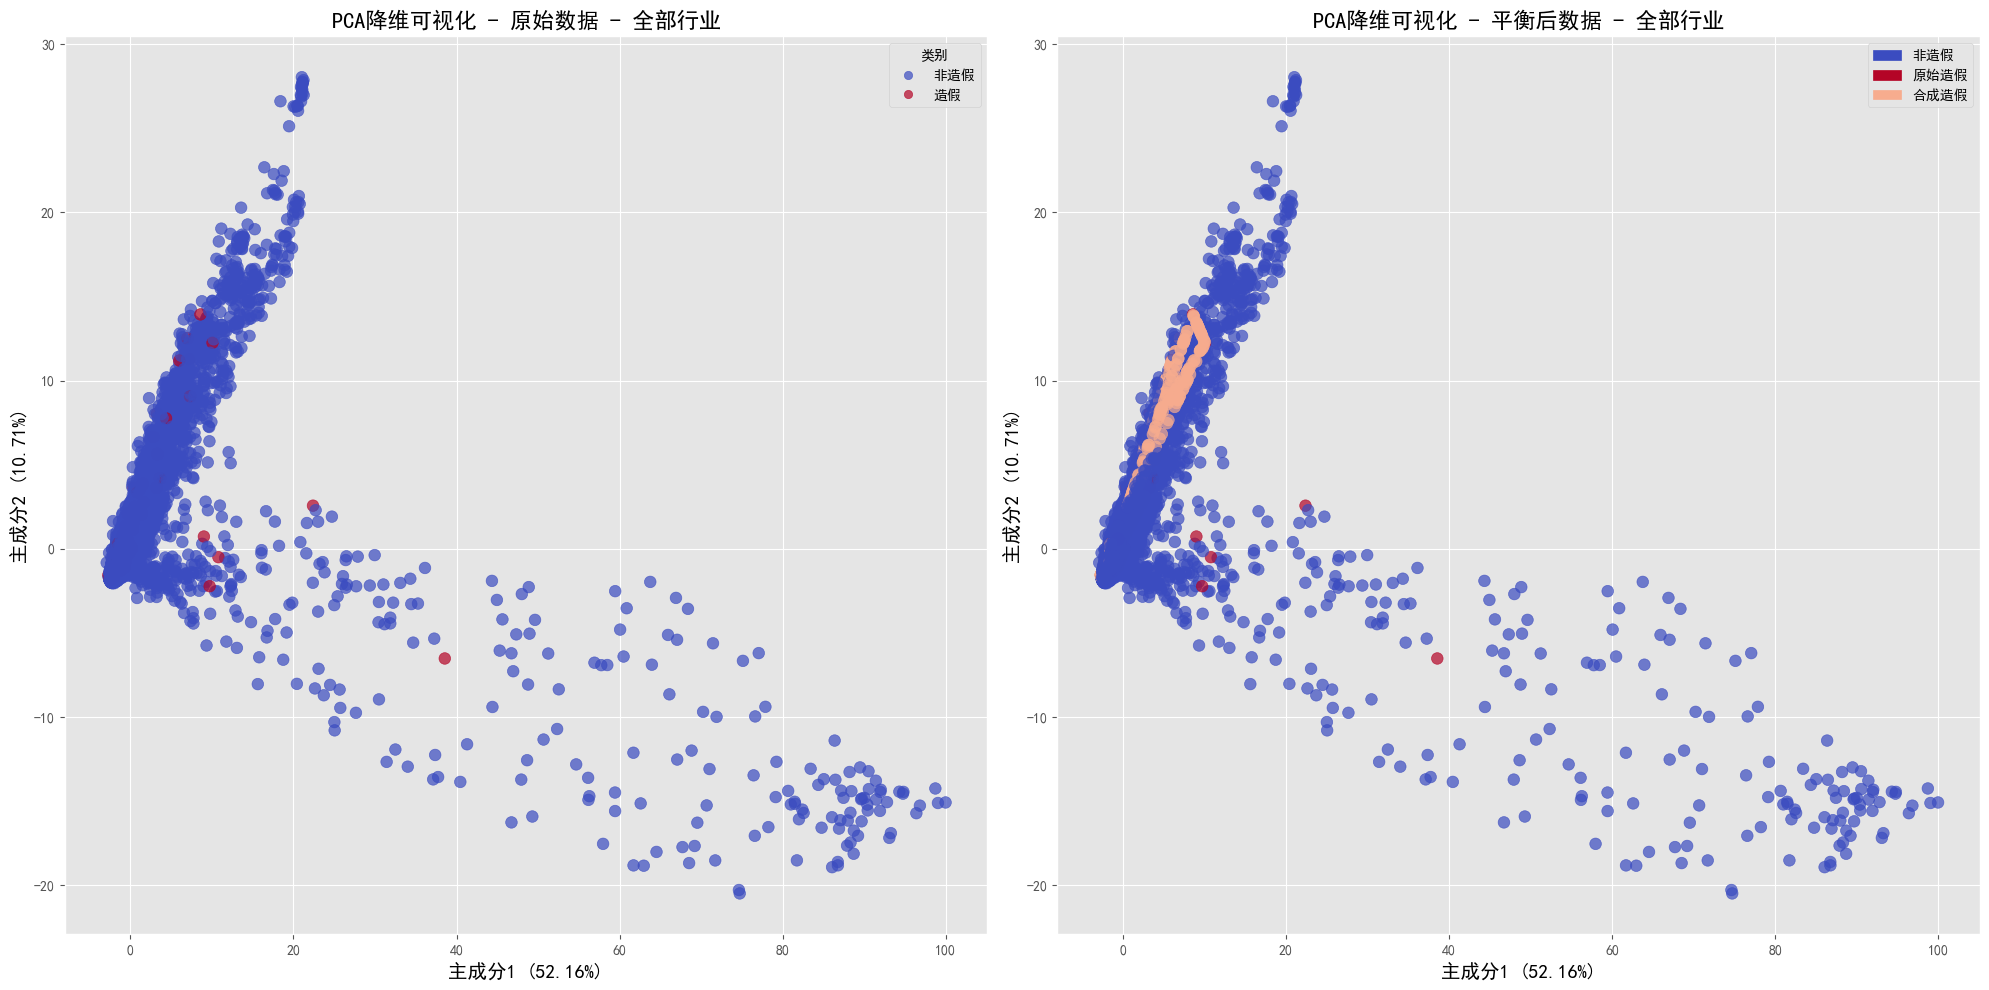

执行所有行业的PCA 3D可视化...
已保存PCA 3D可视化图: output/visualizations\pca_3d.png


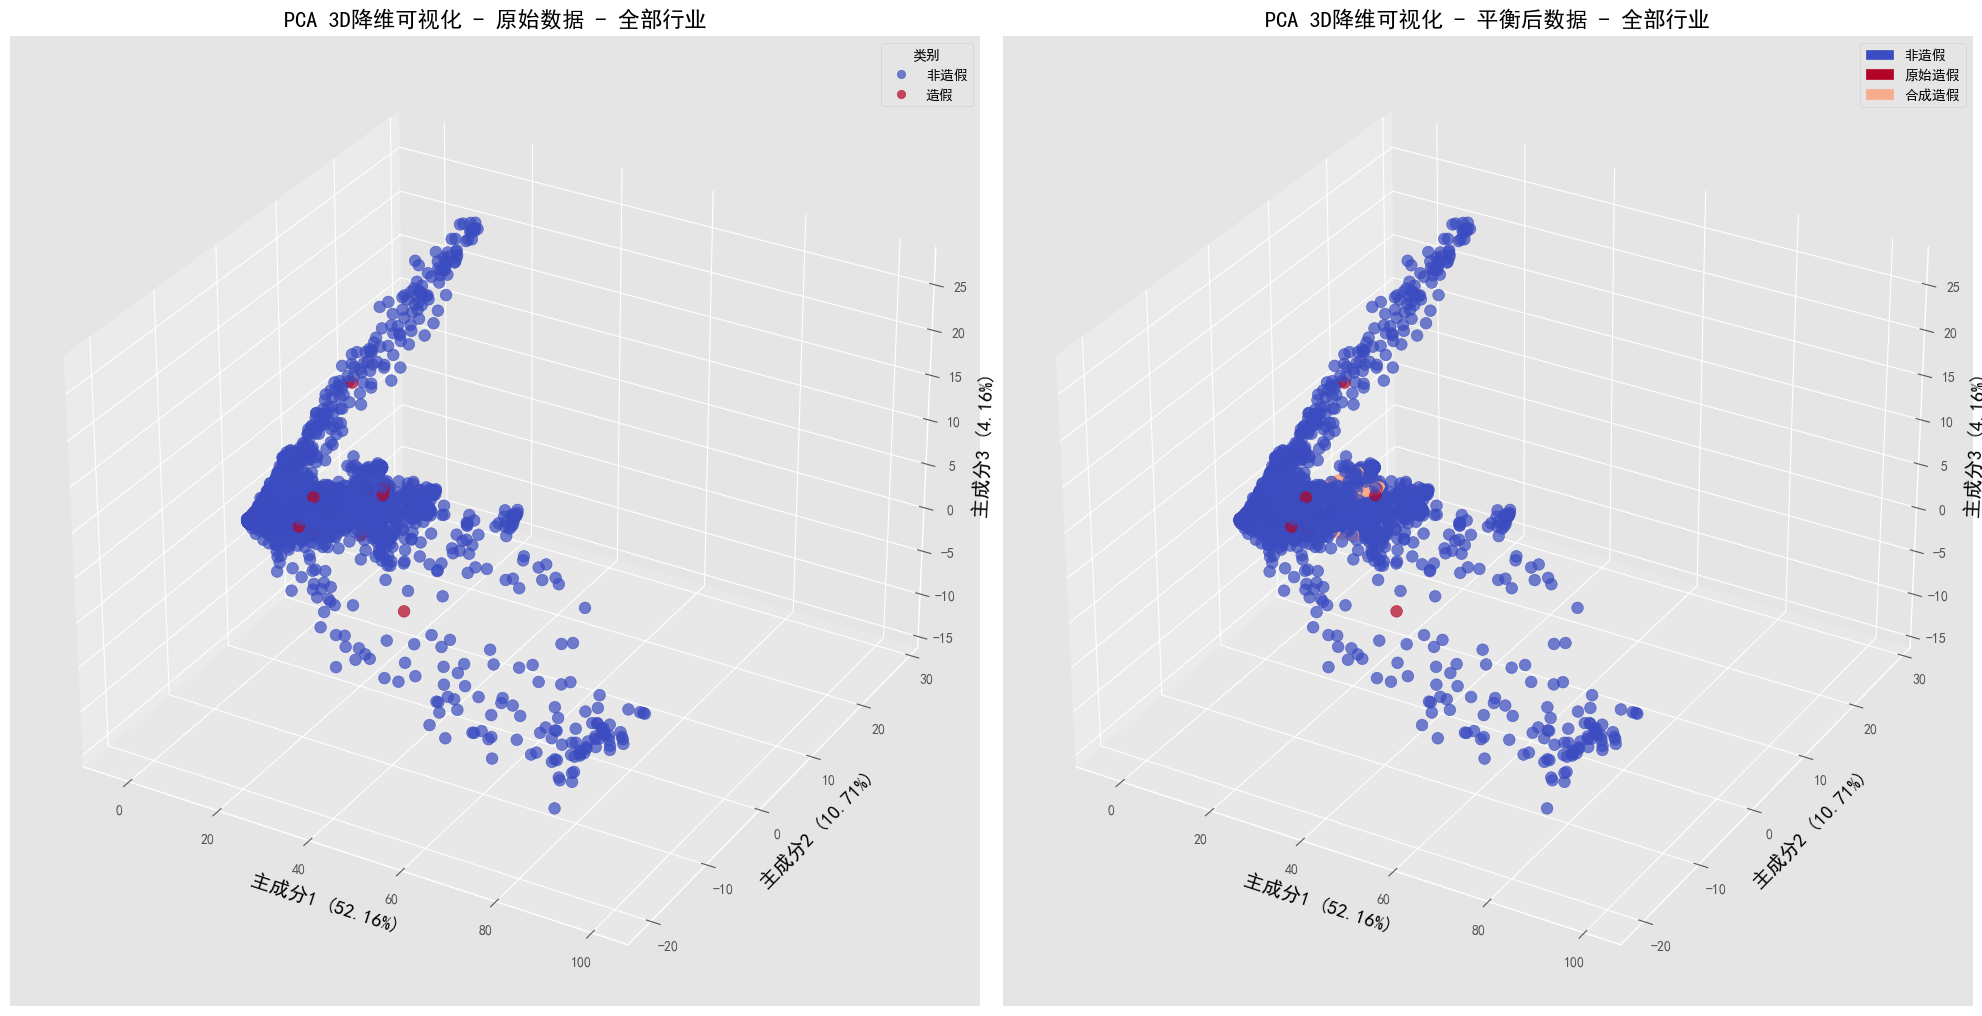


执行制造业行业的PCA 2D可视化...
已保存PCA 2D可视化图: output/visualizations\pca_2d_制造业.png


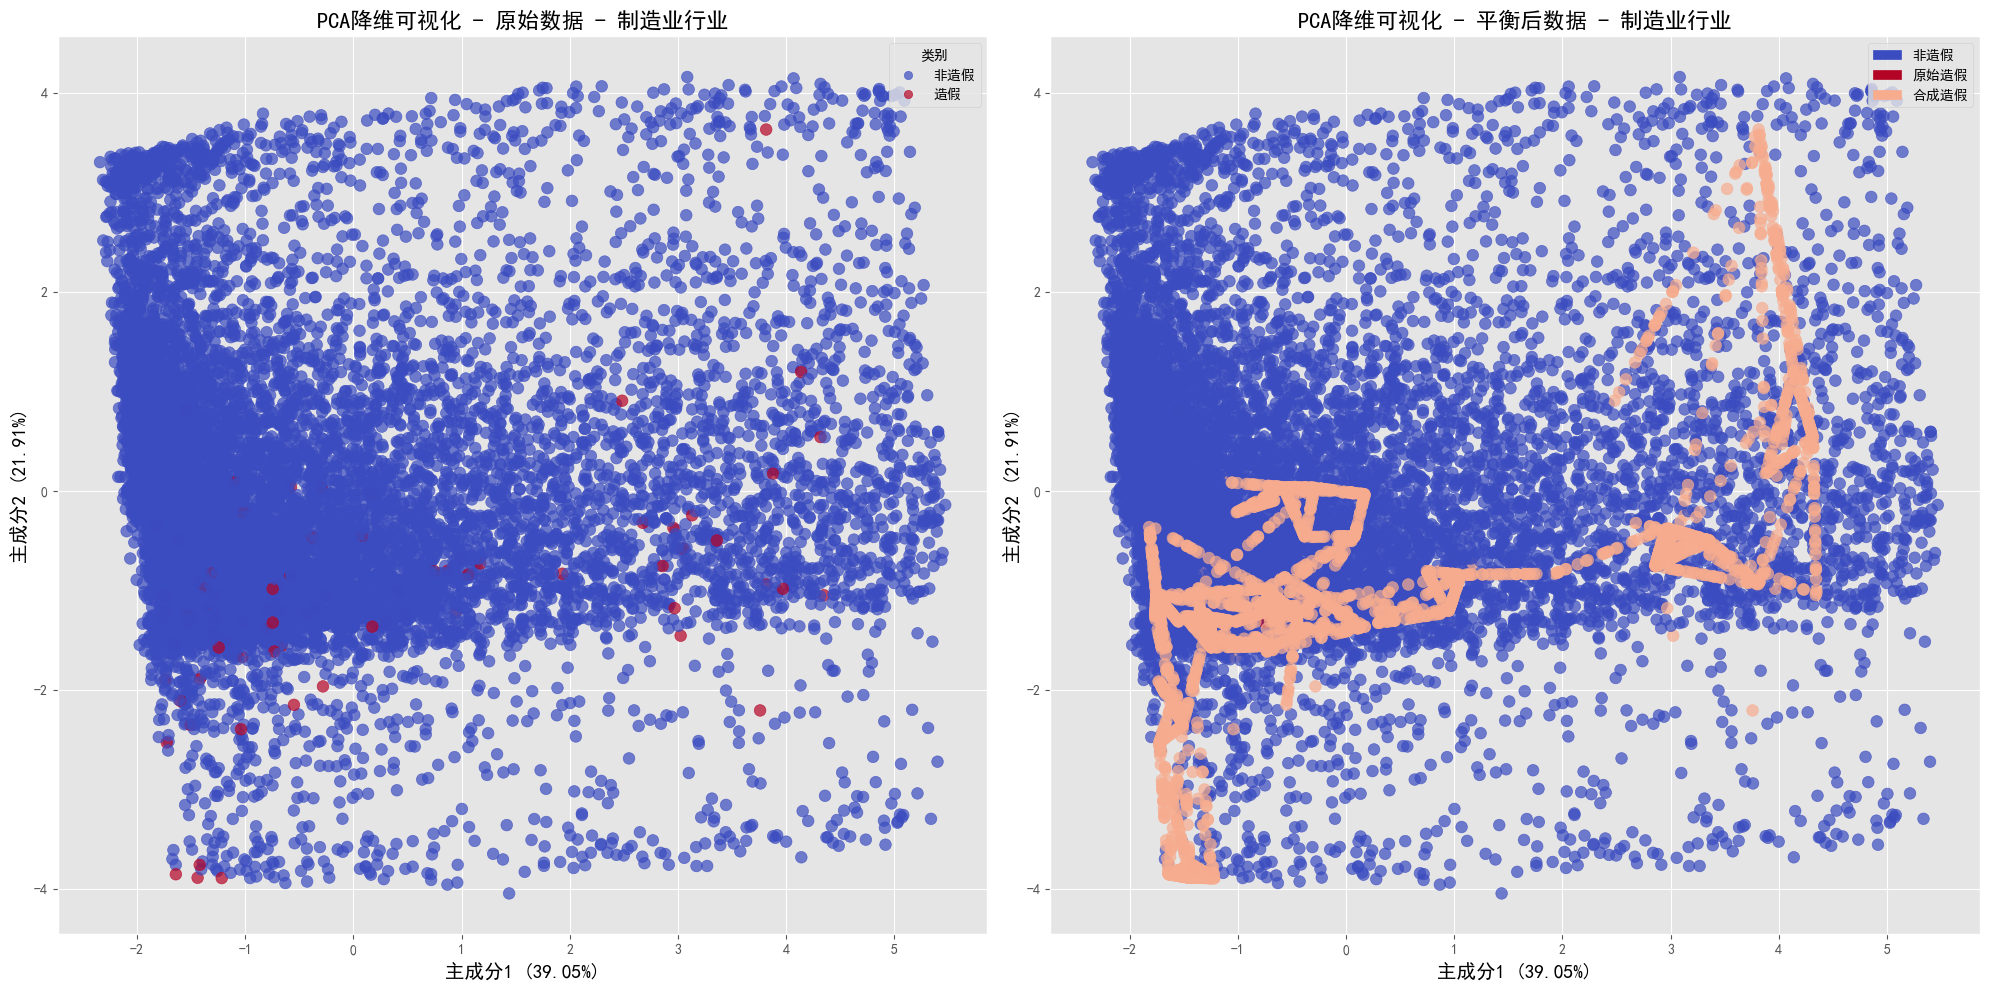

执行制造业行业的t-SNE 2D可视化...
正在进行t-SNE降维，这可能需要一些时间...
已保存t-SNE 2D可视化图: output/visualizations\tsne_2d_制造业.png


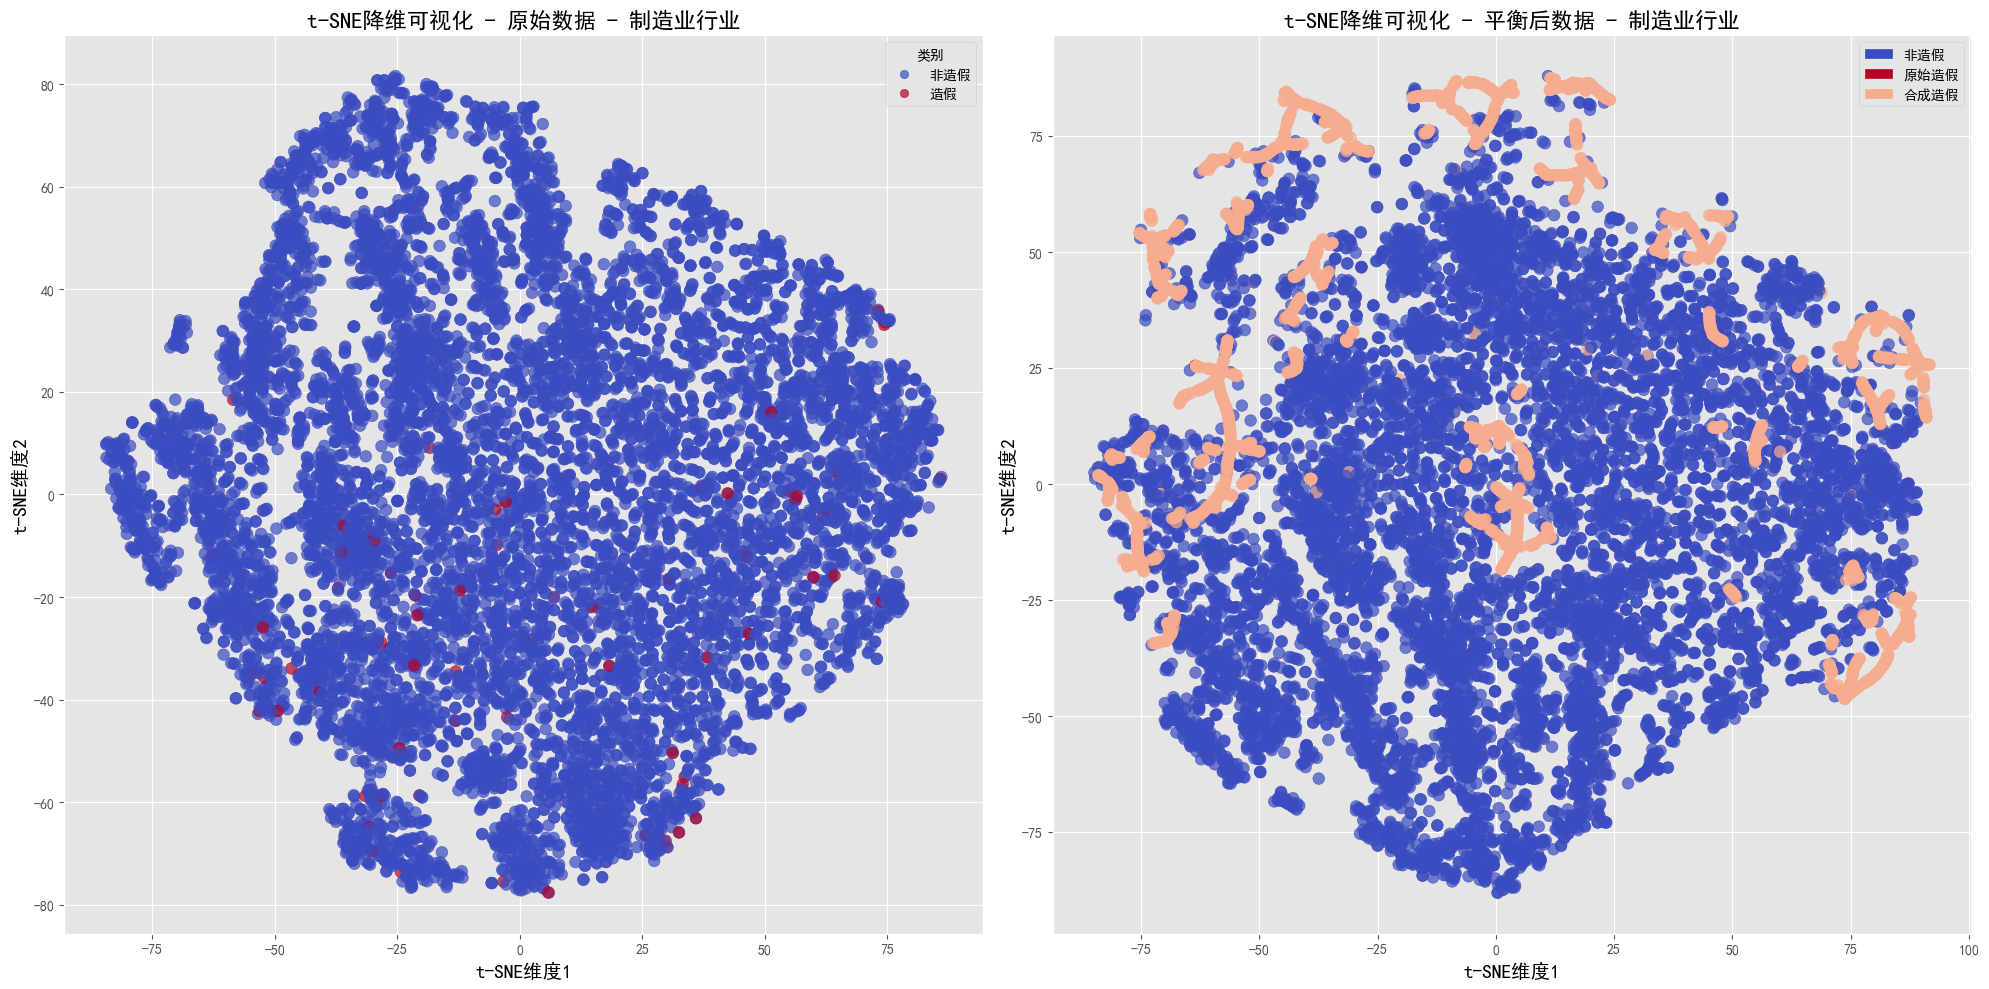


执行信息传输、软件和信息技术服务业行业的PCA 2D可视化...
已保存PCA 2D可视化图: output/visualizations\pca_2d_信息传输、软件和信息技术服务业.png


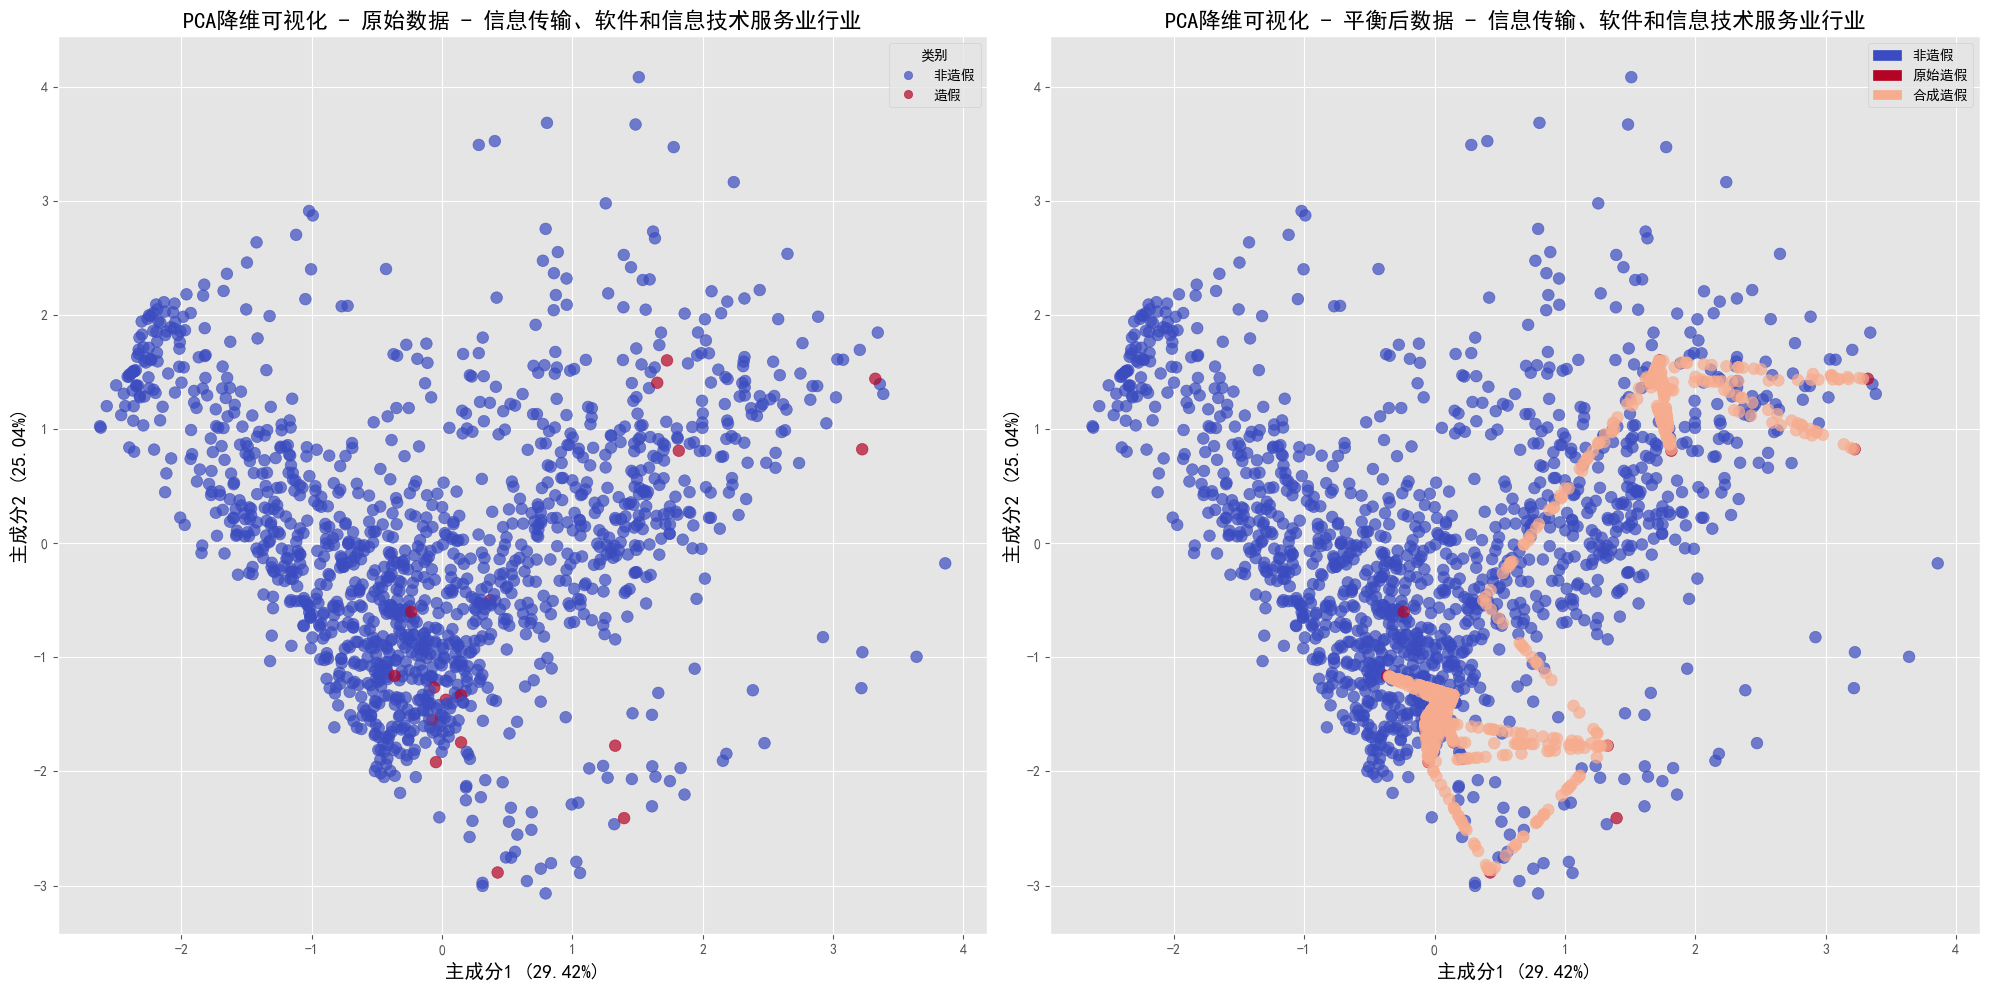

执行信息传输、软件和信息技术服务业行业的t-SNE 2D可视化...
正在进行t-SNE降维，这可能需要一些时间...
已保存t-SNE 2D可视化图: output/visualizations\tsne_2d_信息传输、软件和信息技术服务业.png


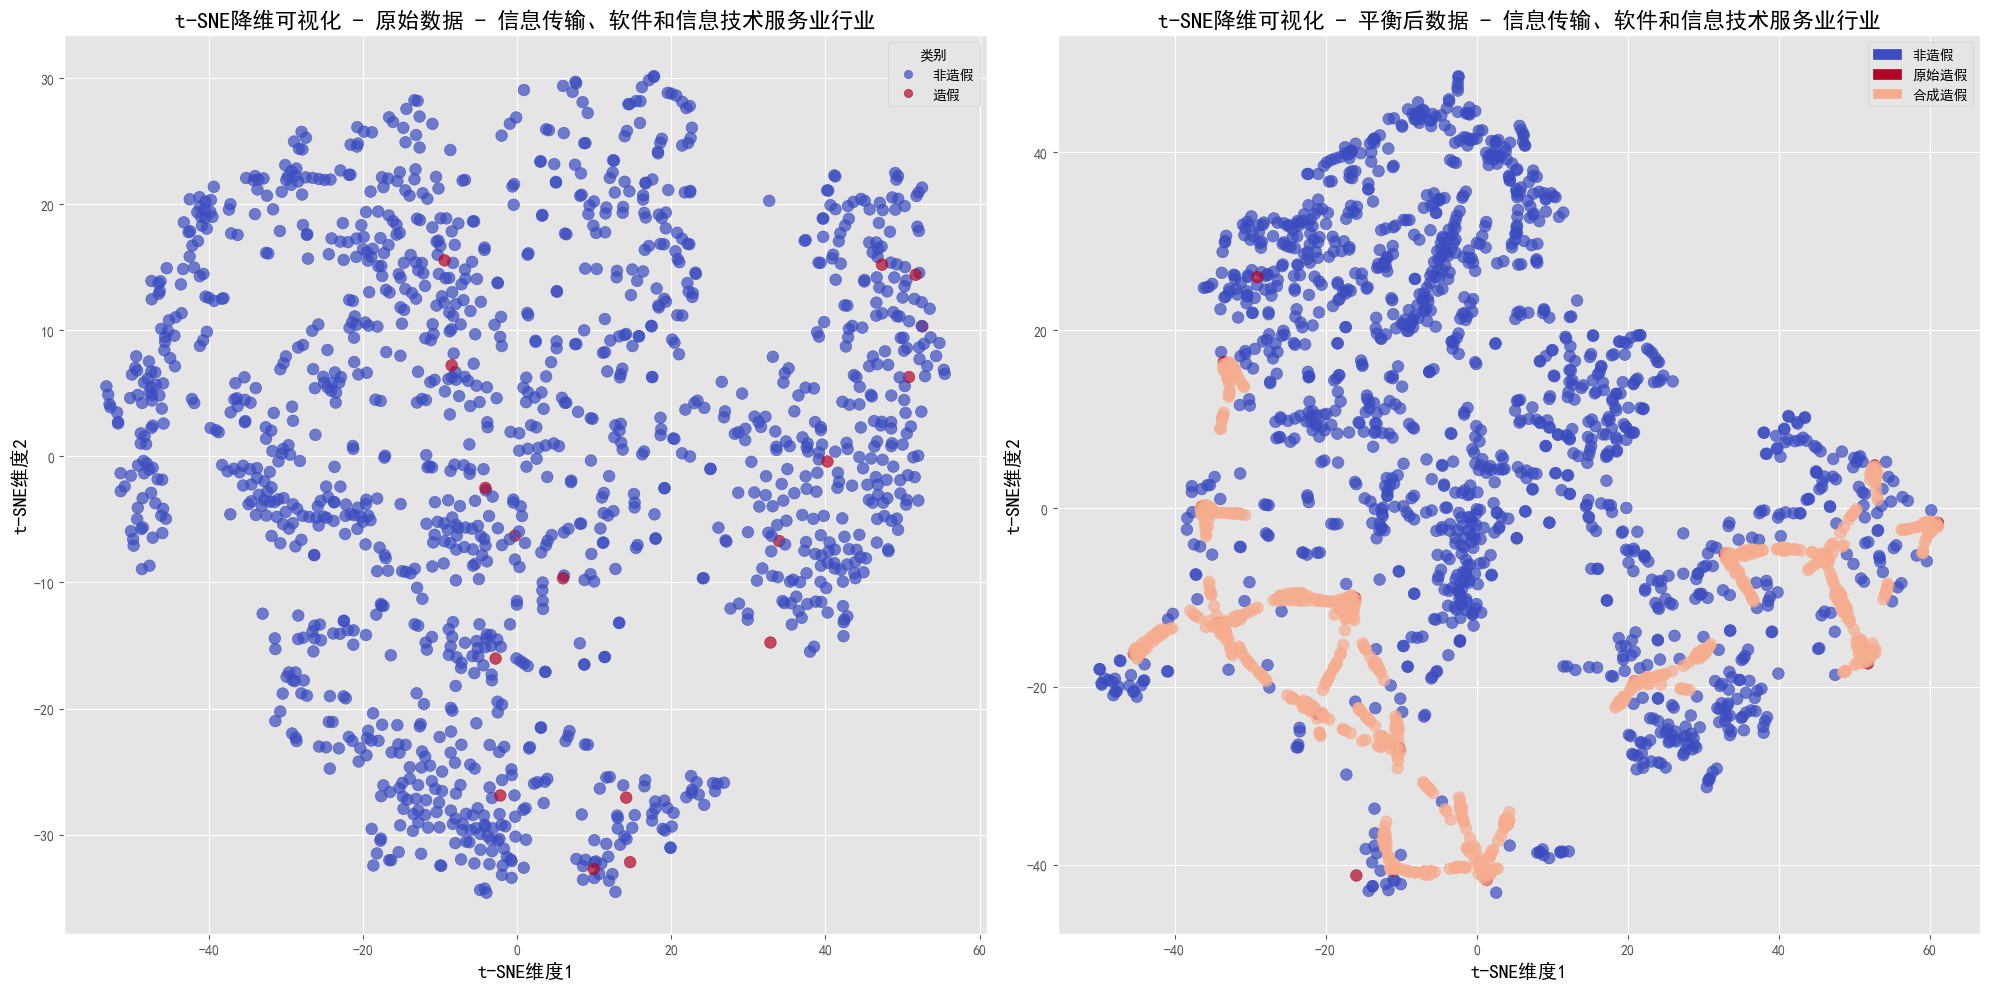


执行批发和零售业行业的PCA 2D可视化...
已保存PCA 2D可视化图: output/visualizations\pca_2d_批发和零售业.png


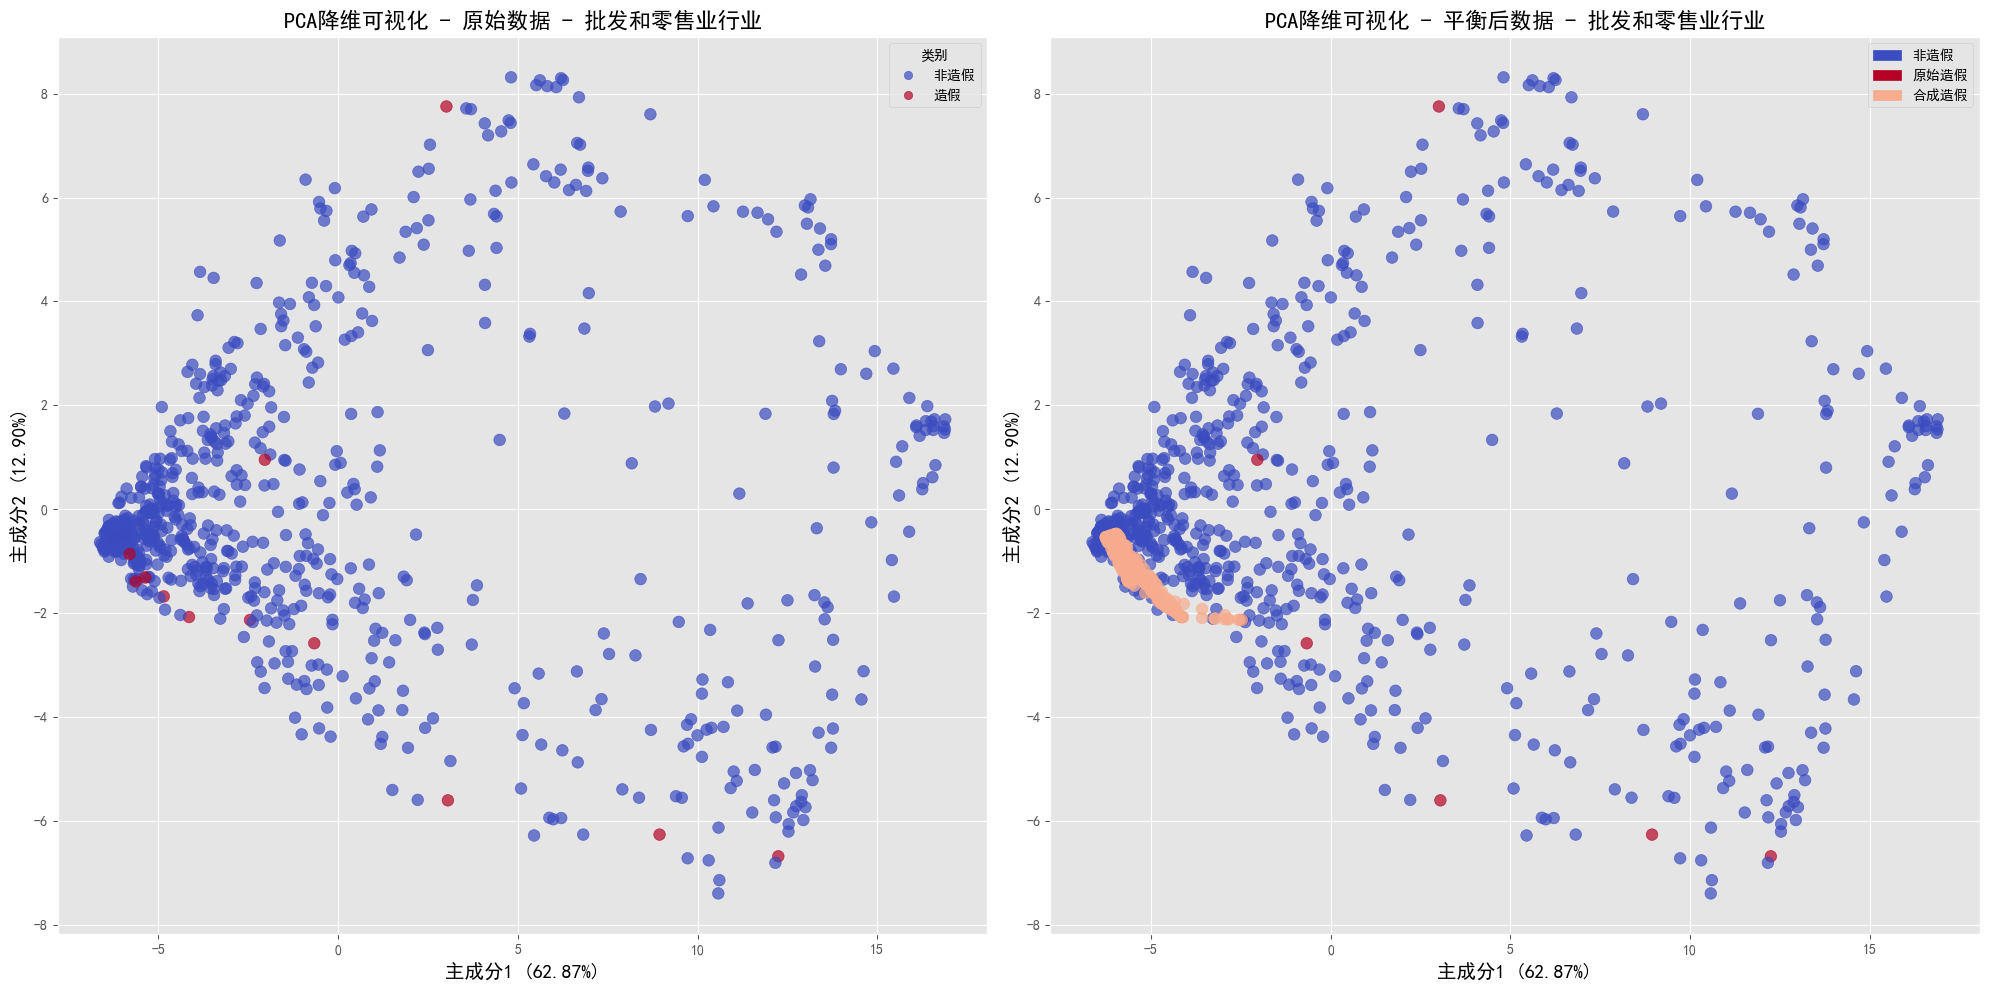

执行批发和零售业行业的t-SNE 2D可视化...
正在进行t-SNE降维，这可能需要一些时间...
已保存t-SNE 2D可视化图: output/visualizations\tsne_2d_批发和零售业.png


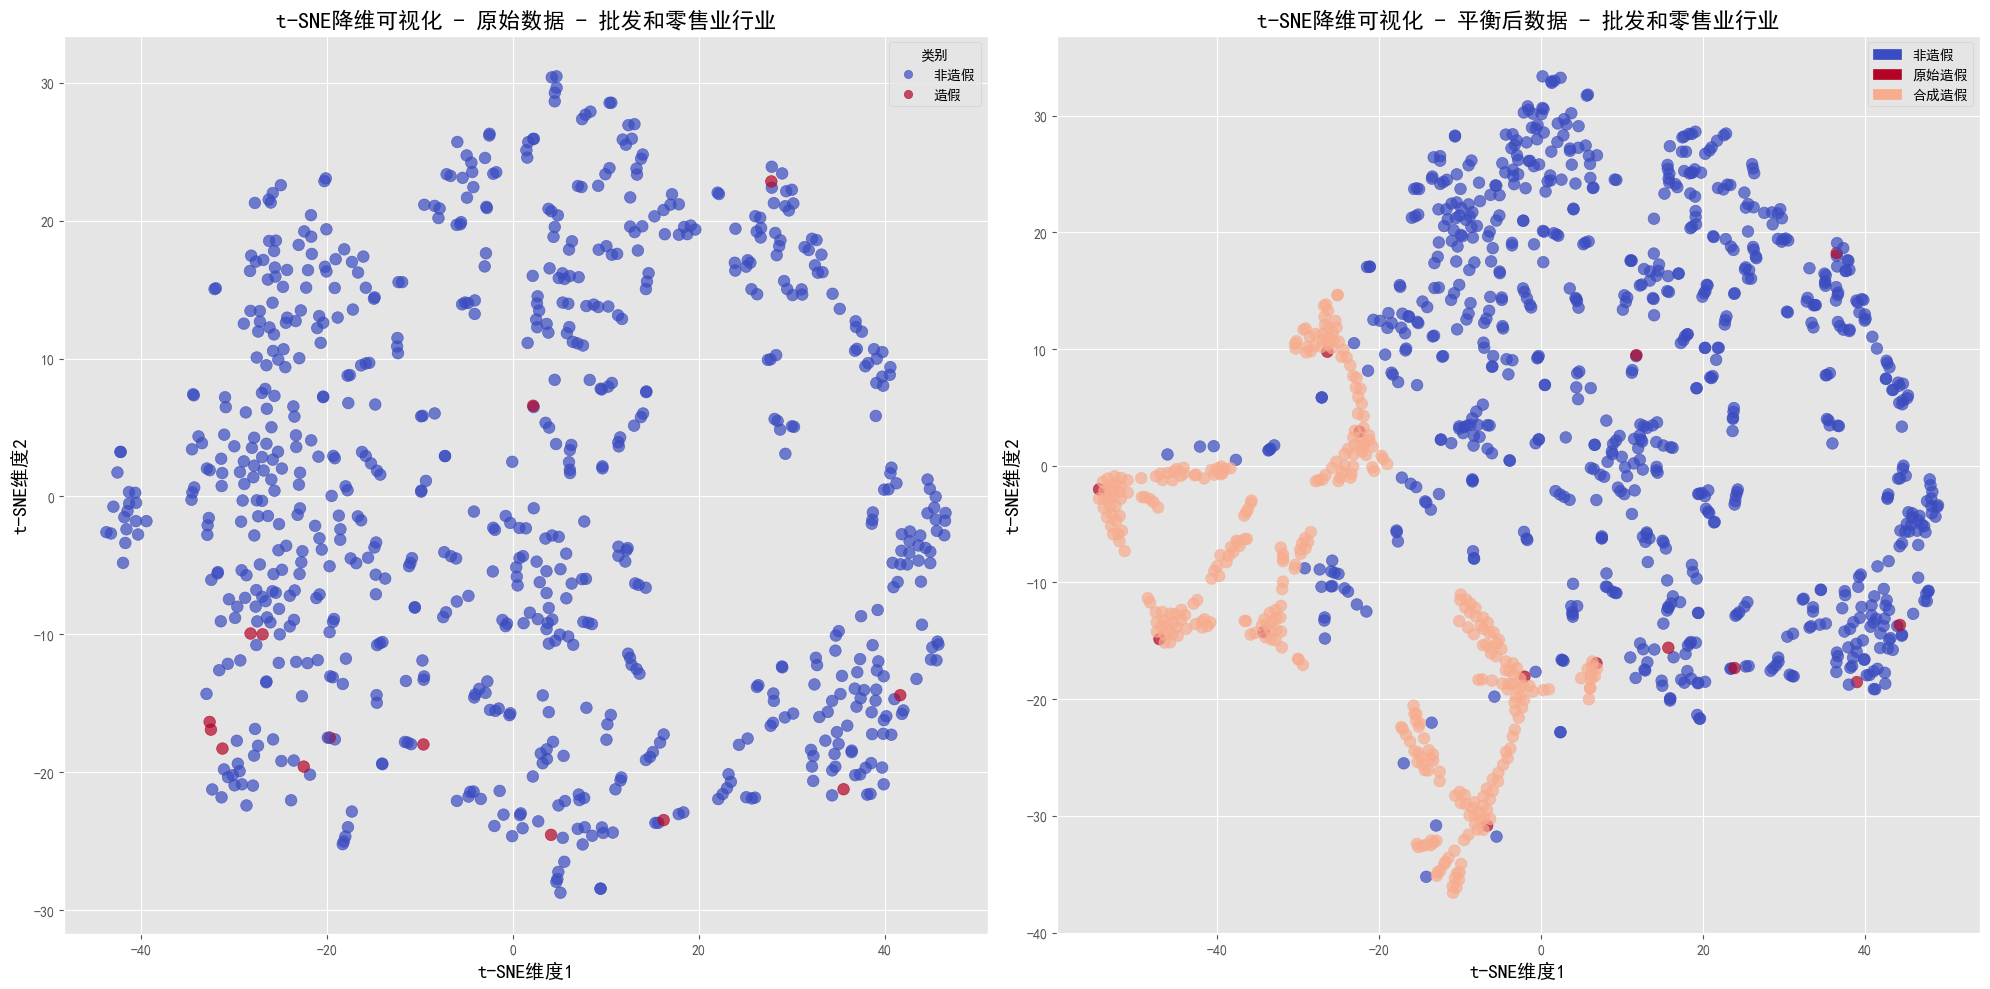


执行所有行业的t-SNE 2D可视化（抽样数据）...
正在进行t-SNE降维，这可能需要一些时间...
已保存t-SNE 2D可视化图: output/visualizations\tsne_2d.png


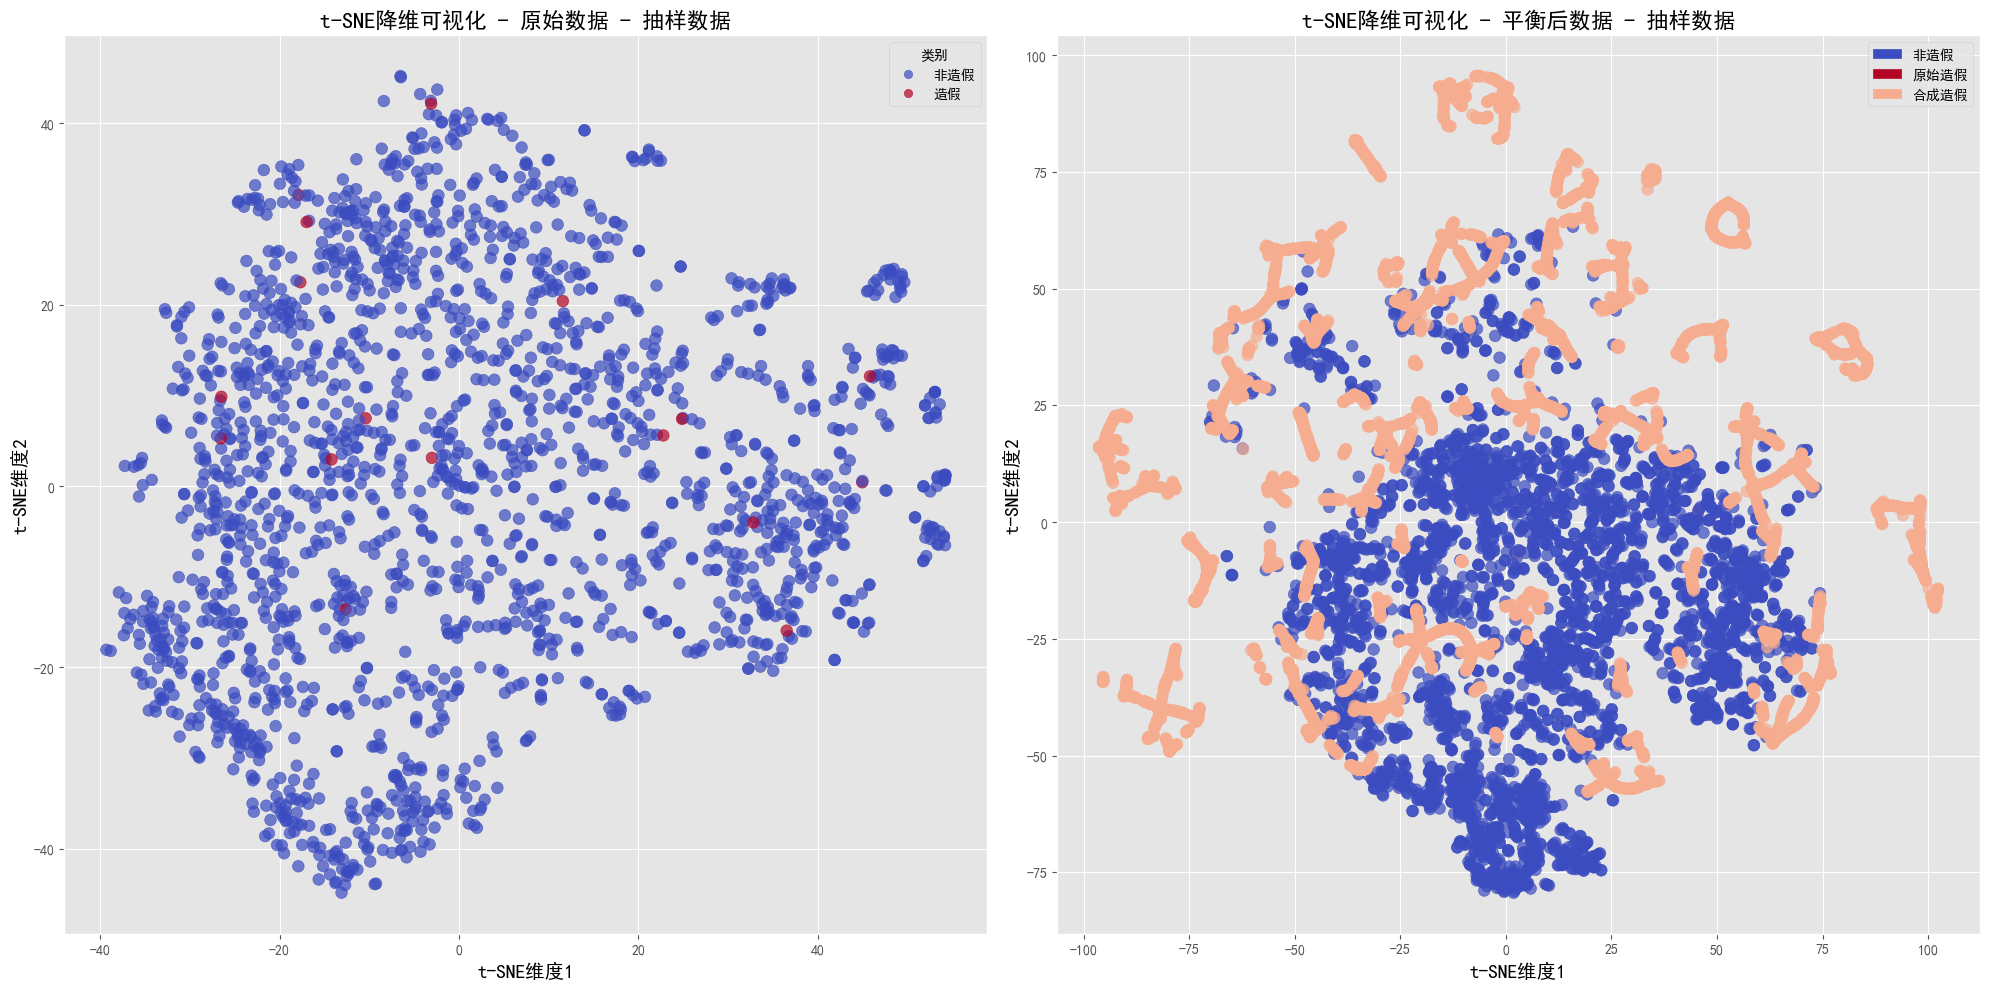


所有可视化已完成，图像保存在 output/visualizations


In [10]:
#数据不平衡之后的可视化

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import os

# 设置中文字体和样式
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
plt.style.use('ggplot')

# 创建输出目录
output_dir = 'image/visualizations'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 读取数据
original_data = pd.read_csv('output/data_standardization.csv')
balanced_data = pd.read_csv('output/data_partial_balanced.csv')

# 分离标记数据和预测数据
original_labeled = original_data[original_data['FLAG'].notna()].copy()
balanced_labeled = balanced_data[balanced_data['FLAG'].notna()].copy()

# 转换FLAG为整数类型
original_labeled['FLAG'] = original_labeled['FLAG'].astype(int)
balanced_labeled['FLAG'] = balanced_labeled['FLAG'].astype(int)

# 区分原始样本和合成样本
balanced_labeled['is_synthetic'] = balanced_labeled['TICKER_SYMBOL'].str.startswith('SYN_')

# 获取特征列
feature_columns = [col for col in original_data.columns 
                  if col not in ['FLAG', 'Industry', 'TICKER_SYMBOL']]

def visualize_pca(original_data, balanced_data, industry=None, n_components=2):
    """
    使用PCA对原始数据和平衡后数据进行降维可视化
    
    参数:
    original_data: 原始数据
    balanced_data: 平衡后数据
    industry: 要可视化的特定行业，None表示所有行业
    n_components: PCA降维的目标维度
    """
    # 筛选特定行业数据
    if industry:
        orig_data = original_data[original_data['Industry'] == industry].copy()
        bal_data = balanced_data[balanced_data['Industry'] == industry].copy()
        title_suffix = f" - {industry}行业"
    else:
        orig_data = original_data.copy()
        bal_data = balanced_data.copy()
        title_suffix = " - 全部行业"
    
    # 获取特征数据和标签
    X_orig = orig_data[feature_columns].values
    y_orig = orig_data['FLAG'].values
    
    X_bal = bal_data[feature_columns].values
    y_bal = bal_data['FLAG'].values
    is_synthetic = bal_data['is_synthetic'].values
    
    # 应用PCA
    pca = PCA(n_components=n_components)
    X_orig_pca = pca.fit_transform(X_orig)
    # 使用与原始数据相同的变换
    X_bal_pca = pca.transform(X_bal)
    
    # 解释方差比例
    explained_variance = pca.explained_variance_ratio_
    
    # 2D可视化
    if n_components == 2:
        fig, axes = plt.subplots(1, 2, figsize=(20, 10))
        
        # 原始数据
        scatter0 = axes[0].scatter(X_orig_pca[:, 0], X_orig_pca[:, 1], 
                                  c=y_orig, cmap='coolwarm', alpha=0.7, s=70)
        axes[0].set_title(f'PCA降维可视化 - 原始数据{title_suffix}', fontsize=16)
        axes[0].set_xlabel(f'主成分1 ({explained_variance[0]:.2%})', fontsize=14)
        axes[0].set_ylabel(f'主成分2 ({explained_variance[1]:.2%})', fontsize=14)
        legend0 = axes[0].legend(*scatter0.legend_elements(), 
                                title="类别", loc="upper right")
        legend_labels = ['非造假', '造假']
        for i, text in enumerate(legend0.get_texts()):
            text.set_text(legend_labels[i])
        
        # 平衡后数据
        # 创建标记为原始和合成样本的颜色映射
        cmap = cm.get_cmap('coolwarm')
        colors = []
        for i in range(len(y_bal)):
            if y_bal[i] == 0:  # 非造假
                colors.append(cmap(0.0))  # 蓝色
            else:  # 造假
                if is_synthetic[i]:  # 合成造假样本
                    colors.append(cmap(0.7))  # 浅红色
                else:  # 原始造假样本
                    colors.append(cmap(1.0))  # 深红色
        
        scatter1 = axes[1].scatter(X_bal_pca[:, 0], X_bal_pca[:, 1], 
                                  c=colors, alpha=0.7, s=70)
        axes[1].set_title(f'PCA降维可视化 - 平衡后数据{title_suffix}', fontsize=16)
        axes[1].set_xlabel(f'主成分1 ({explained_variance[0]:.2%})', fontsize=14)
        axes[1].set_ylabel(f'主成分2 ({explained_variance[1]:.2%})', fontsize=14)
        
        # 创建自定义图例
        blue_patch = mpatches.Patch(color=cmap(0.0), label='非造假')
        red_patch = mpatches.Patch(color=cmap(1.0), label='原始造假')
        light_red_patch = mpatches.Patch(color=cmap(0.7), label='合成造假')
        axes[1].legend(handles=[blue_patch, red_patch, light_red_patch],
                      loc="upper right")
        
        plt.tight_layout()
        
        # 保存图像
        save_path = os.path.join(output_dir, f'pca_2d{"_" + industry if industry else ""}.png')
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"已保存PCA 2D可视化图: {save_path}")
        
        plt.show()
    
    # 3D可视化
    elif n_components == 3:
        fig = plt.figure(figsize=(20, 10))
        
        # 原始数据3D可视化
        ax1 = fig.add_subplot(121, projection='3d')
        scatter1 = ax1.scatter(X_orig_pca[:, 0], X_orig_pca[:, 1], X_orig_pca[:, 2], 
                              c=y_orig, cmap='coolwarm', alpha=0.7, s=70)
        ax1.set_title(f'PCA 3D降维可视化 - 原始数据{title_suffix}', fontsize=16)
        ax1.set_xlabel(f'主成分1 ({explained_variance[0]:.2%})', fontsize=14)
        ax1.set_ylabel(f'主成分2 ({explained_variance[1]:.2%})', fontsize=14)
        ax1.set_zlabel(f'主成分3 ({explained_variance[2]:.2%})', fontsize=14)
        legend1 = ax1.legend(*scatter1.legend_elements(), 
                            title="类别", loc="upper right")
        legend_labels = ['非造假', '造假']
        for i, text in enumerate(legend1.get_texts()):
            text.set_text(legend_labels[i])
        
        # 平衡后数据3D可视化
        ax2 = fig.add_subplot(122, projection='3d')
        
        # 创建标记为原始和合成样本的颜色映射
        cmap = cm.get_cmap('coolwarm')
        colors = []
        for i in range(len(y_bal)):
            if y_bal[i] == 0:  # 非造假
                colors.append(cmap(0.0))  # 蓝色
            else:  # 造假
                if is_synthetic[i]:  # 合成造假样本
                    colors.append(cmap(0.7))  # 浅红色
                else:  # 原始造假样本
                    colors.append(cmap(1.0))  # 深红色
        
        ax2.scatter(X_bal_pca[:, 0], X_bal_pca[:, 1], X_bal_pca[:, 2], 
                   c=colors, alpha=0.7, s=70)
        ax2.set_title(f'PCA 3D降维可视化 - 平衡后数据{title_suffix}', fontsize=16)
        ax2.set_xlabel(f'主成分1 ({explained_variance[0]:.2%})', fontsize=14)
        ax2.set_ylabel(f'主成分2 ({explained_variance[1]:.2%})', fontsize=14)
        ax2.set_zlabel(f'主成分3 ({explained_variance[2]:.2%})', fontsize=14)
        
        # 创建自定义图例
        blue_patch = mpatches.Patch(color=cmap(0.0), label='非造假')
        red_patch = mpatches.Patch(color=cmap(1.0), label='原始造假')
        light_red_patch = mpatches.Patch(color=cmap(0.7), label='合成造假')
        ax2.legend(handles=[blue_patch, red_patch, light_red_patch],
                  loc="upper right")
        
        plt.tight_layout()
        
        # 保存图像
        save_path = os.path.join(output_dir, f'pca_3d{"_" + industry if industry else ""}.png')
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"已保存PCA 3D可视化图: {save_path}")
        
        plt.show()

def visualize_tsne(original_data, balanced_data, industry=None, perplexity=30, n_components=2):
    """
    使用t-SNE对原始数据和平衡后数据进行降维可视化
    
    参数:
    original_data: 原始数据
    balanced_data: 平衡后数据
    industry: 要可视化的特定行业，None表示所有行业
    perplexity: t-SNE的perplexity参数
    n_components: t-SNE降维的目标维度
    """
    # 筛选特定行业数据
    if industry:
        orig_data = original_data[original_data['Industry'] == industry].copy()
        bal_data = balanced_data[balanced_data['Industry'] == industry].copy()
        title_suffix = f" - {industry}行业"
    else:
        # 对于t-SNE，全部数据可能太大，可以选择随机抽样
        if len(original_data) > 2000:
            orig_data = original_data.sample(2000, random_state=42).copy()
            # 找出原始数据中的样本，并在平衡后数据中找到对应的及其合成样本
            orig_tickers = set(orig_data['TICKER_SYMBOL'])
            bal_data = balanced_data[
                balanced_data['TICKER_SYMBOL'].isin(orig_tickers) | 
                balanced_data['is_synthetic']
            ].copy()
        else:
            orig_data = original_data.copy()
            bal_data = balanced_data.copy()
        title_suffix = " - 抽样数据"
    
    # 获取特征数据和标签
    X_orig = orig_data[feature_columns].values
    y_orig = orig_data['FLAG'].values
    
    X_bal = bal_data[feature_columns].values
    y_bal = bal_data['FLAG'].values
    is_synthetic = bal_data['is_synthetic'].values
    
    # 使用t-SNE降维
    print(f"正在进行t-SNE降维，这可能需要一些时间...")
    tsne = TSNE(n_components=n_components, perplexity=perplexity, 
               random_state=42, n_iter=1000)
    X_orig_tsne = tsne.fit_transform(X_orig)
    
    # 对平衡后数据使用新的t-SNE（因为t-SNE不能直接应用之前的变换）
    tsne_bal = TSNE(n_components=n_components, perplexity=perplexity, 
                   random_state=42, n_iter=1000)
    X_bal_tsne = tsne_bal.fit_transform(X_bal)
    
    # 2D可视化
    if n_components == 2:
        fig, axes = plt.subplots(1, 2, figsize=(20, 10))
        
        # 原始数据
        scatter0 = axes[0].scatter(X_orig_tsne[:, 0], X_orig_tsne[:, 1], 
                                  c=y_orig, cmap='coolwarm', alpha=0.7, s=70)
        axes[0].set_title(f't-SNE降维可视化 - 原始数据{title_suffix}', fontsize=16)
        axes[0].set_xlabel('t-SNE维度1', fontsize=14)
        axes[0].set_ylabel('t-SNE维度2', fontsize=14)
        legend0 = axes[0].legend(*scatter0.legend_elements(), 
                                title="类别", loc="upper right")
        legend_labels = ['非造假', '造假']
        for i, text in enumerate(legend0.get_texts()):
            text.set_text(legend_labels[i])
        
        # 平衡后数据
        # 创建标记为原始和合成样本的颜色映射
        cmap = cm.get_cmap('coolwarm')
        colors = []
        for i in range(len(y_bal)):
            if y_bal[i] == 0:  # 非造假
                colors.append(cmap(0.0))  # 蓝色
            else:  # 造假
                if is_synthetic[i]:  # 合成造假样本
                    colors.append(cmap(0.7))  # 浅红色
                else:  # 原始造假样本
                    colors.append(cmap(1.0))  # 深红色
        
        scatter1 = axes[1].scatter(X_bal_tsne[:, 0], X_bal_tsne[:, 1], 
                                  c=colors, alpha=0.7, s=70)
        axes[1].set_title(f't-SNE降维可视化 - 平衡后数据{title_suffix}', fontsize=16)
        axes[1].set_xlabel('t-SNE维度1', fontsize=14)
        axes[1].set_ylabel('t-SNE维度2', fontsize=14)
        
        # 创建自定义图例
        blue_patch = mpatches.Patch(color=cmap(0.0), label='非造假')
        red_patch = mpatches.Patch(color=cmap(1.0), label='原始造假')
        light_red_patch = mpatches.Patch(color=cmap(0.7), label='合成造假')
        axes[1].legend(handles=[blue_patch, red_patch, light_red_patch],
                      loc="upper right")
        
        plt.tight_layout()
        
        # 保存图像
        save_path = os.path.join(output_dir, f'tsne_2d{"_" + industry if industry else ""}.png')
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"已保存t-SNE 2D可视化图: {save_path}")
        
        plt.show()

# def visualize_umap(original_data, balanced_data, industry=None, n_components=2, n_neighbors=15, min_dist=0.1):
#     """
#     使用UMAP对原始数据和平衡后数据进行降维可视化
    
#     参数:
#     original_data: 原始数据
#     balanced_data: 平衡后数据
#     industry: 要可视化的特定行业，None表示所有行业
#     n_components: UMAP降维的目标维度
#     n_neighbors: UMAP的n_neighbors参数，控制局部与全局结构的平衡
#     min_dist: UMAP的min_dist参数，控制点之间的最小距离
#     """
#     # 筛选特定行业数据
#     if industry:
#         orig_data = original_data[original_data['Industry'] == industry].copy()
#         bal_data = balanced_data[balanced_data['Industry'] == industry].copy()
#         title_suffix = f" - {industry}行业"
#     else:
#         # 对于UMAP，全部数据可能太大，可以选择随机抽样
#         if len(original_data) > 2000:
#             orig_data = original_data.sample(2000, random_state=42).copy()
#             # 找出原始数据中的样本，并在平衡后数据中找到对应的及其合成样本
#             orig_tickers = set(orig_data['TICKER_SYMBOL'])
#             bal_data = balanced_data[
#                 balanced_data['TICKER_SYMBOL'].isin(orig_tickers) | 
#                 balanced_data['is_synthetic']
#             ].copy()
#         else:
#             orig_data = original_data.copy()
#             bal_data = balanced_data.copy()
#         title_suffix = " - 抽样数据"
    
#     # 获取特征数据和标签
#     X_orig = orig_data[feature_columns].values
#     y_orig = orig_data['FLAG'].values
    
#     X_bal = bal_data[feature_columns].values
#     y_bal = bal_data['FLAG'].values
#     is_synthetic = bal_data['is_synthetic'].values
    
#     # 使用UMAP降维
#     print(f"正在进行UMAP降维，这可能需要一些时间...")
#     reducer = umap.UMAP(n_components=n_components, 
#                       n_neighbors=n_neighbors,
#                       min_dist=min_dist,
#                       random_state=42)
#     X_orig_umap = reducer.fit_transform(X_orig)
    
#     # 对平衡后数据使用新的UMAP（因为UMAP不能直接应用之前的变换）
#     reducer_bal = umap.UMAP(n_components=n_components,
#                           n_neighbors=n_neighbors,
#                           min_dist=min_dist,
#                           random_state=42)
#     X_bal_umap = reducer_bal.fit_transform(X_bal)
    
#     # 2D可视化
#     if n_components == 2:
#         fig, axes = plt.subplots(1, 2, figsize=(20, 10))
        
#         # 原始数据
#         scatter0 = axes[0].scatter(X_orig_umap[:, 0], X_orig_umap[:, 1], 
#                                   c=y_orig, cmap='coolwarm', alpha=0.7, s=70)
#         axes[0].set_title(f'UMAP降维可视化 - 原始数据{title_suffix}', fontsize=16)
#         axes[0].set_xlabel('UMAP维度1', fontsize=14)
#         axes[0].set_ylabel('UMAP维度2', fontsize=14)
#         legend0 = axes[0].legend(*scatter0.legend_elements(), 
#                                 title="类别", loc="upper right")
#         legend_labels = ['非造假', '造假']
#         for i, text in enumerate(legend0.get_texts()):
#             text.set_text(legend_labels[i])
        
#         # 平衡后数据
#         # 创建标记为原始和合成样本的颜色映射
#         cmap = cm.get_cmap('coolwarm')
#         colors = []
#         for i in range(len(y_bal)):
#             if y_bal[i] == 0:  # 非造假
#                 colors.append(cmap(0.0))  # 蓝色
#             else:  # 造假
#                 if is_synthetic[i]:  # 合成造假样本
#                     colors.append(cmap(0.7))  # 浅红色
#                 else:  # 原始造假样本
#                     colors.append(cmap(1.0))  # 深红色
        
#         scatter1 = axes[1].scatter(X_bal_umap[:, 0], X_bal_umap[:, 1], 
#                                   c=colors, alpha=0.7, s=70)
#         axes[1].set_title(f'UMAP降维可视化 - 平衡后数据{title_suffix}', fontsize=16)
#         axes[1].set_xlabel('UMAP维度1', fontsize=14)
#         axes[1].set_ylabel('UMAP维度2', fontsize=14)
        
#         # 创建自定义图例
#         blue_patch = mpatches.Patch(color=cmap(0.0), label='非造假')
#         red_patch = mpatches.Patch(color=cmap(1.0), label='原始造假')
#         light_red_patch = mpatches.Patch(color=cmap(0.7), label='合成造假')
#         axes[1].legend(handles=[blue_patch, red_patch, light_red_patch],
#                       loc="upper right")
        
#         plt.tight_layout()
        
#         # 保存图像
#         save_path = os.path.join(output_dir, f'umap_2d{"_" + industry if industry else ""}.png')
#         plt.savefig(save_path, dpi=300, bbox_inches='tight')
#         print(f"已保存UMAP 2D可视化图: {save_path}")
        
#         plt.show()



# 所有行业的PCA 2D和3D可视化
print("执行所有行业的PCA 2D可视化...")
visualize_pca(original_labeled, balanced_labeled, industry=None, n_components=2)

print("执行所有行业的PCA 3D可视化...")
visualize_pca(original_labeled, balanced_labeled, industry=None, n_components=3)

# 获取造假样本最多的前三个行业
fraud_by_industry = original_labeled.groupby('Industry')['FLAG'].sum().sort_values(ascending=False)
top_industries = fraud_by_industry.head(3).index.tolist()

# 对这些主要行业进行可视化
for industry in top_industries:
    print(f"\n执行{industry}行业的PCA 2D可视化...")
    visualize_pca(original_labeled, balanced_labeled, industry=industry, n_components=2)
    
    print(f"执行{industry}行业的t-SNE 2D可视化...")
    visualize_tsne(original_labeled, balanced_labeled, industry=industry, perplexity=30)
    

# t-SNE对所有数据的可视化
print("\n执行所有行业的t-SNE 2D可视化（抽样数据）...")
visualize_tsne(original_labeled, balanced_labeled, industry=None, perplexity=30)


print("\n所有可视化已完成，图像保存在", output_dir)

In [17]:
final_resampled_df

END_DATE  CASH_C_EQUIV  NOTES_RECEIV        AR  PREPAYMENT  OTH_RECEIV  \
0     -1.578910     -0.127690      0.482459 -0.220450   -0.498358   -0.336966   
1     -0.987834     -0.166072      0.390996 -0.327804   -0.521286   -0.323813   
2     -0.396758     -0.163578      0.807785 -0.179797   -0.480905   -0.193013   
3      0.194318     -0.182623      1.689726  0.299742   -0.485941   -0.191530   
4      0.785394      0.035011      2.142317  0.156432   -0.235781   -0.178581   
...         ...           ...           ...       ...         ...         ...   
33270  0.198109     -0.159360     -0.644515 -0.721261   -0.523453   -0.323883   
33271  0.193927     -0.160589     -0.739970 -0.675643   -0.434106   -0.302309   
33272  0.200124     -0.169846     -0.683956 -0.675147   -0.503013   -0.325553   
33273  0.176341     -0.173930     -0.672516 -0.745689   -0.486117   -0.291188   
33274  0.200833     -0.172214     -0.698718 -0.701727   -0.489589   -0.334473   

       INVENTORIES    OTH_CA      T_CA  AVAIL_FOR_SALE_FA  ...  \
0        -0.390305  0.003235 -0.163626          -0.121116  ...   
1        -0.360167 -0.230419 -0.172173          -0.121116  ...   
2        -0.304054  0.381167 -0.145801          -0.121116  ...   
3        -0.308534  0.072750 -0.148103          -0.121116  ...   
4        -0.286658 -0.154125 -0.091533          -0.119701  ...   
...            ...       ...       ...                ...  ...   
33270    -0.002164 -0.252883 -0.148367          -0.119753  ...   
33271    -0.002030 -0.259929 -0.159128          -0.122058  ...   
33272    -0.002451 -0.272628 -0.162754          -0.121016  ...   
33273    -0.002418 -0.255956 -0.155141          -0.125262  ...   
33274    -0.001876 -0.269487 -0.160032          -0.121764  ...   

       GOING_CONCERN_NI  COMPR_INC_ATTR_M_S  INCOME_TAX  NOPERATE_INCOME  \
0             -0.489579           -0.298663   -0.241477        -0.094542   
1             -0.489579           -0.364228   -0.286611        -0.125275   
2             -0.489579           -0.677756   -0.435038        -0.147569   
3             -0.220360           -0.341373   -0.309463         0.941231   
4              0.682063           -0.366047   -0.127504        -0.661553   
...                 ...                 ...         ...              ...   
33270         -0.236970           -0.105397   -0.163597         0.794228   
33271         -0.258659           -0.105951   -0.175350         0.822639   
33272         -0.249220           -0.103864   -0.157702         0.816558   
33273         -0.272741           -0.102568   -0.150223         0.818831   
33274         -0.257057           -0.105707   -0.156372         0.759175   

       MINORITY_GAIN    T_COGS  FLAG  Industry  Category  TICKER_SYMBOL  
0          -0.302019 -0.606189   0.0       制造业    重资产制造类           4019  
1          -0.363384 -0.607732   0.0       制造业    重资产制造类           4019  
2          -0.672465 -0.518886   0.0       制造业    重资产制造类           4019  
3          -0.343578 -0.418028   0.0       制造业    重资产制造类           4019  
4          -0.366786 -0.462655   0.0       制造业    重资产制造类           4019  
...              ...       ...   ...       ...       ...            ...  
33270      -0.104033 -0.577429   1.0        综合       其他类      SYN_综合_74  
33271      -0.098072 -0.526302   1.0        综合       其他类      SYN_综合_75  
33272      -0.105151 -0.584709   1.0        综合       其他类      SYN_综合_76  
33273      -0.107619 -0.548178   1.0        综合       其他类      SYN_综合_77  
33274      -0.104712 -0.529265   1.0        综合       其他类      SYN_综合_78  

[33275 rows x 109 columns]